## About Dataset features

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

### Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

### FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

### ✨ The fullform of FWI is Forest Weather Index. The FWI is a system which is used worldwide to estimate the fire danger ✨.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("forest_fires.csv")
data = data.iloc[:,1:]
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not_fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not_fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not_fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not_fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not_fire


In [3]:
data.iloc[:,-1].value_counts()

fire        138
not_fire    106
Name: Classes, dtype: int64

In [4]:
data.shape

(244, 14)

In [5]:
data["day"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

In [6]:
round(2.45678,2)

2.46

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(13), object(1)
memory usage: 26.8+ KB


In [8]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

### Okay, Cool😎

### 👉 Let's see the correlation between the input features

<AxesSubplot:>

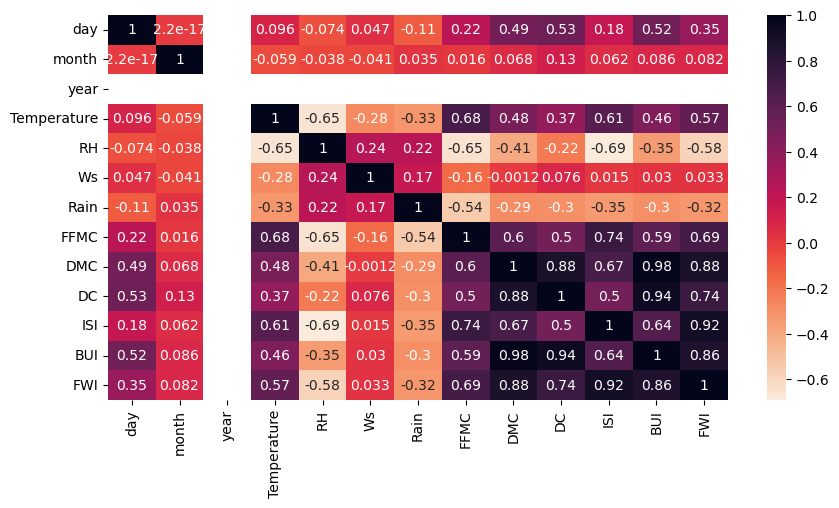

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="rocket_r")

### 👉 Here there is no correlation for the Year Column

### 👉 we will drop and see the correlation matrix .

<AxesSubplot:>

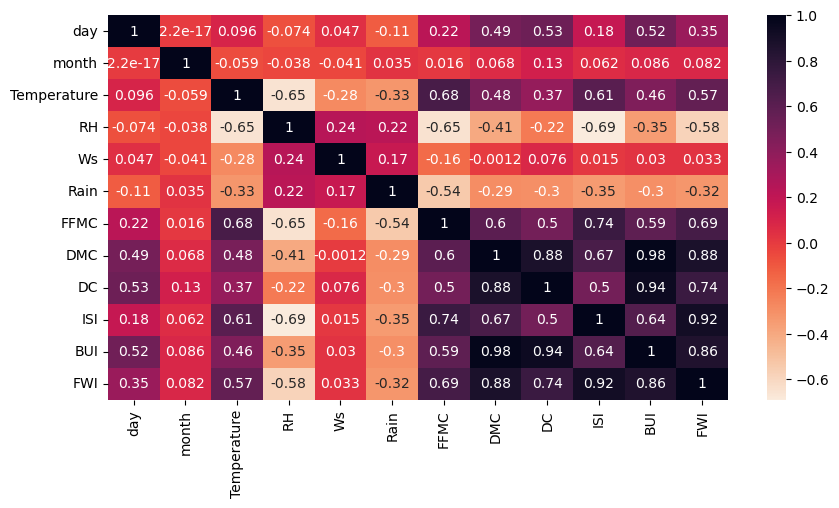

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop(columns=["year"]).corr(),annot=True,cmap="rocket_r")

In [11]:
def cor_number_background(cell_value):
        highlight1 = 'background-color: lightcoral;' #strong positive
        highlight2 = 'background-color: palegreen;' #weak positive
        highlight3 = 'background-color: yellow;' #strong negative
        highlight4 = 'background-color: skyblue;' #weak negative
        default = ''
        if cell_value>=0.5:
            return highlight1
        elif cell_value<=-0.5:
            return highlight3
        elif cell_value<0.5 and cell_value>0:
            return highlight2
        elif cell_value>-0.5 and cell_value<0:
            return highlight4
        else:
            return default

data.drop(columns=["year"]).corr().style.applymap(cor_number_background)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,0.000000,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350592
month,0.000000,1.000000,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.082285
Temperature,0.095772,-0.059017,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.565497
RH,-0.074209,-0.037884,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.578717
Ws,0.047001,-0.041447,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.032936
Rain,-0.112265,0.035322,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324546
FFMC,0.224032,0.015577,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.690786
DMC,0.491571,0.068178,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875674
DC,0.527929,0.127672,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.738155
ISI,0.177727,0.061680,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.917586


✨✨1. Lightcoral - Strong Positive✨✨

✨✨2. Pale Green - Weak Positive✨✨

✨✨3. Yellow     - Strong Negative✨✨

✨✨4. Skyblue    - Weak Negative✨✨

## Distribution plots

In [12]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

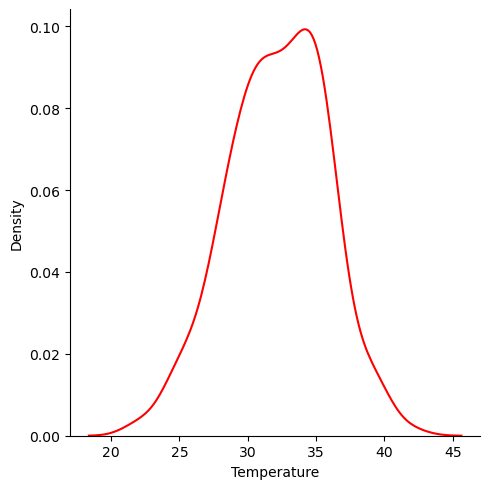

In [13]:
sns.displot(data=data,x=data.loc[:,"Temperature"],kind="kde",color="red");

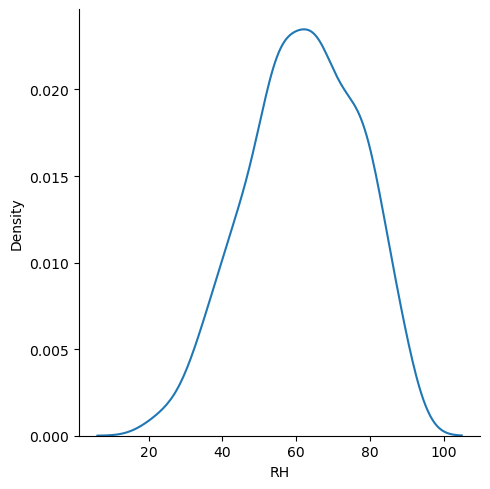

In [14]:
sns.displot(data=data,x=data.loc[:,"RH"],kind="kde")

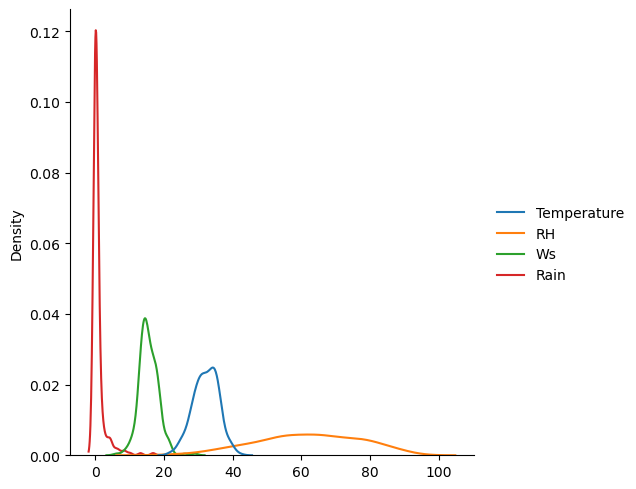

In [15]:
sns.displot(data=data.loc[:,['Temperature', 'RH', 'Ws', 'Rain']],kind="kde")

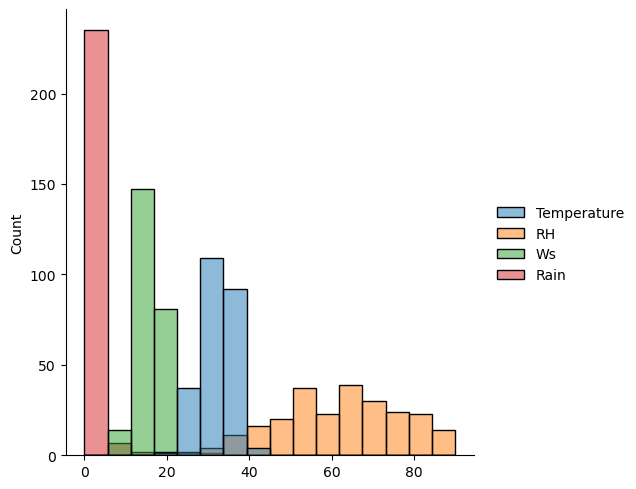

In [16]:
sns.displot(data=data.loc[:,['Temperature', 'RH', 'Ws', 'Rain']],kind="hist")

<AxesSubplot:ylabel='Count'>

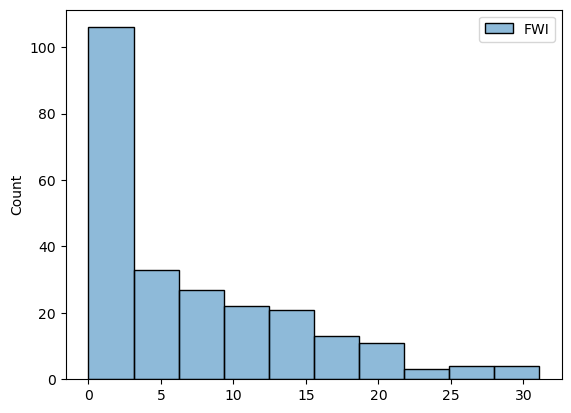

In [17]:
sns.histplot(data=data.loc[:,["FWI"]])

## categorical plot

In [18]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

D:\Software_Installations\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='FWI', ylabel='Classes'>

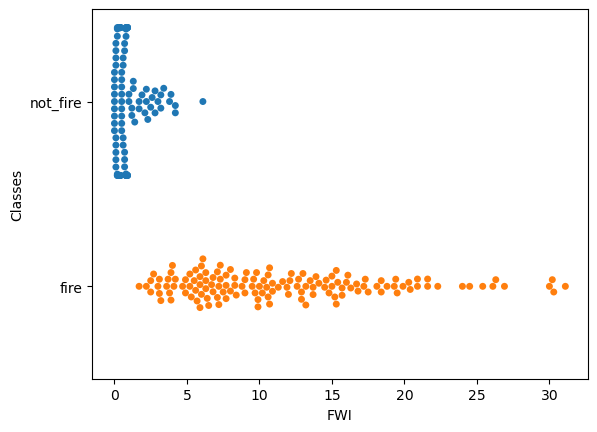

In [19]:
sns.swarmplot(x=data['FWI'],y=data["Classes"])

<AxesSubplot:xlabel='FWI', ylabel='Classes'>

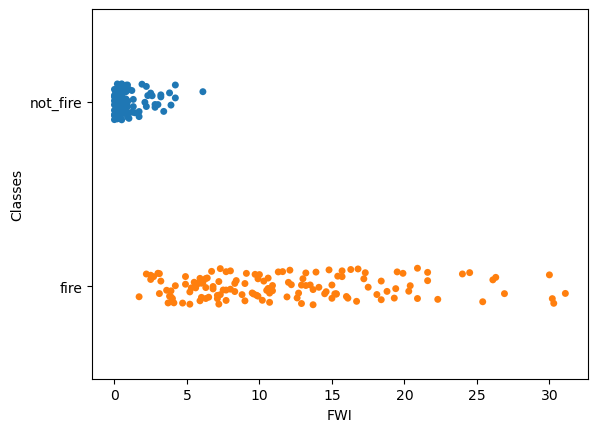

In [20]:
sns.stripplot(data=data,x=data['FWI'],y=data["Classes"])

### When FWI value is more than 8 then there is a chance of fire

<AxesSubplot:xlabel='Rain', ylabel='Classes'>

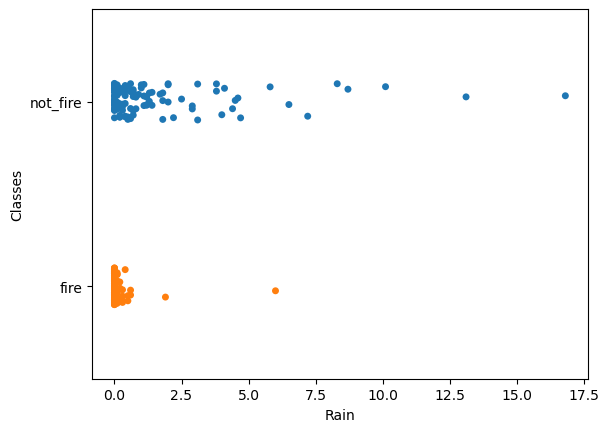

In [21]:
sns.stripplot(data=data,x=data['Rain'],y=data["Classes"])

<AxesSubplot:xlabel='Ws', ylabel='Classes'>

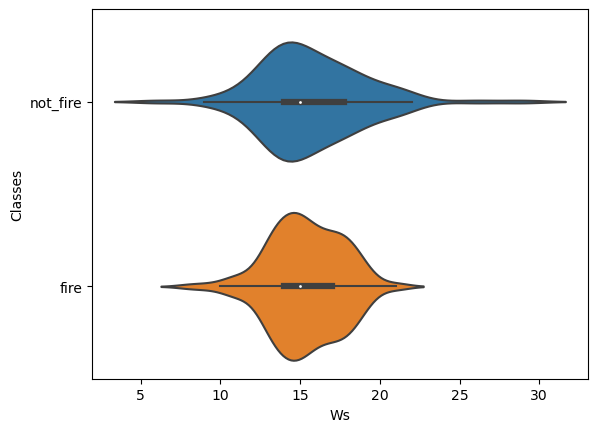

In [22]:
sns.violinplot(data=data,x='Ws',y="Classes")

<AxesSubplot:xlabel='BUI', ylabel='Classes'>

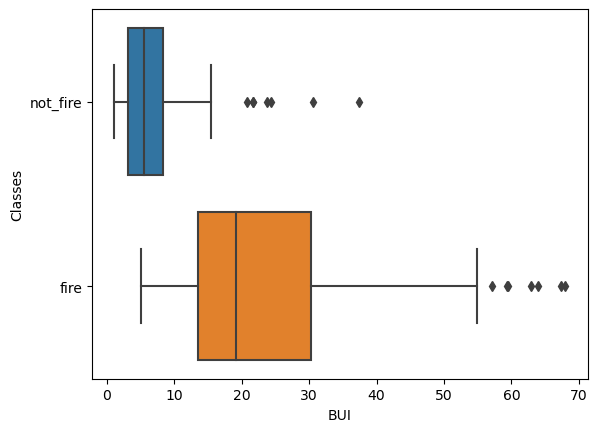

In [23]:
sns.boxplot(data=data,x='BUI',y="Classes")

## Count plots

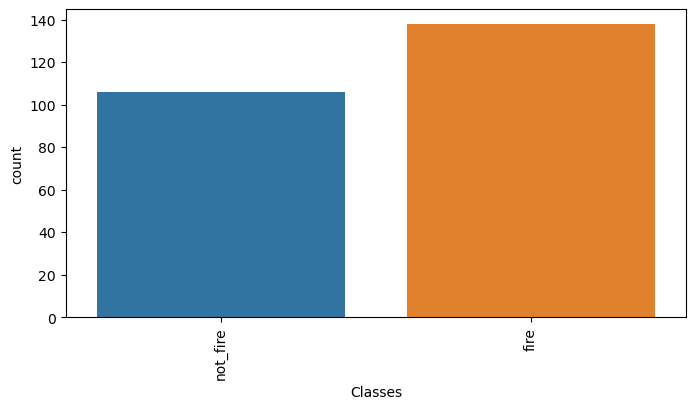

In [24]:
plt.figure(figsize=(8,4))
# sns.set(font_scale=2)
sns.countplot(x=data["Classes"])
plt.xticks(rotation=90);

## relational, and regression plots

In [25]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

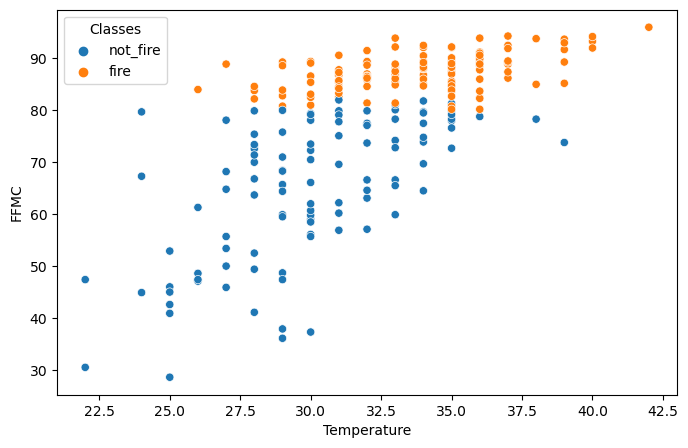

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x="Temperature",y="FFMC",hue="Classes")

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

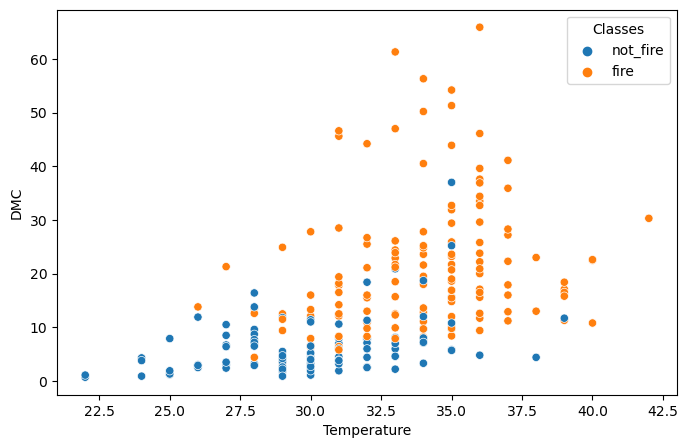

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x="Temperature",y="DMC",hue="Classes")

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

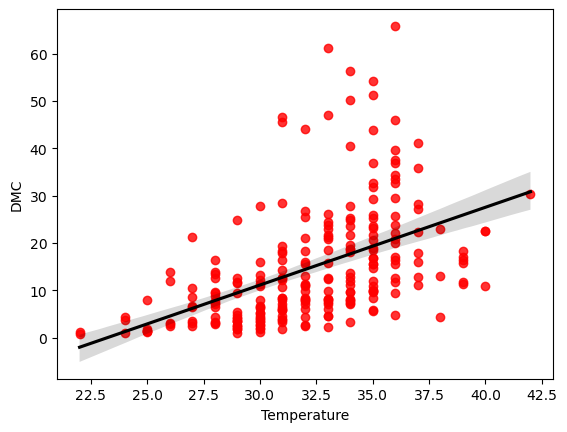

In [28]:
sns.regplot(data=data,x="Temperature",y="DMC",line_kws={"color":"black"},scatter_kws={"color":"red"})

In [29]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

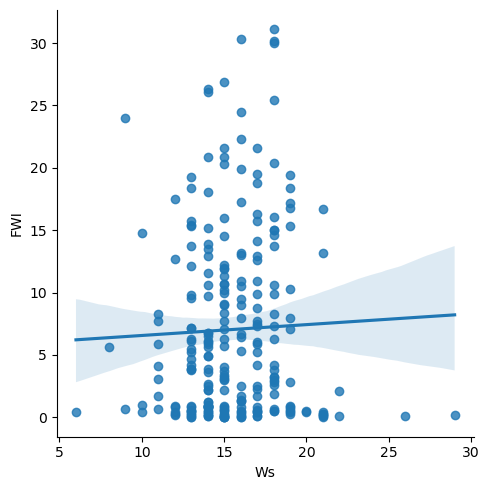

In [30]:
sns.lmplot(data=data,x="Ws",y='FWI')

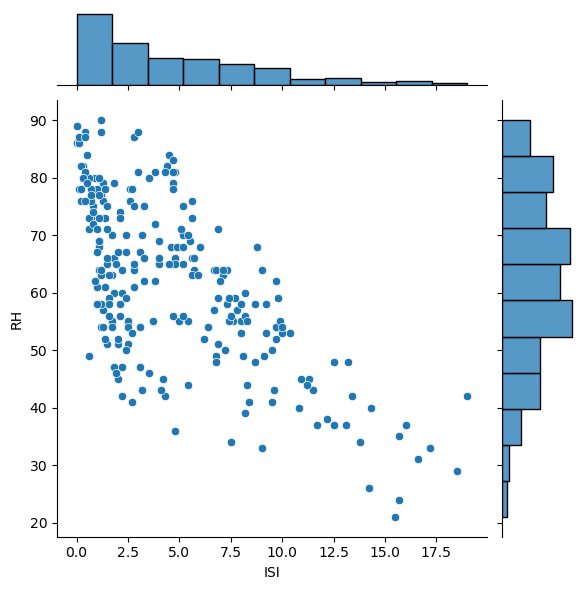

In [31]:
sns.jointplot(data=data,x="ISI",y='RH')

### 👉 I don't want to consider the day, month, and year features for model building, because this data doesn't play any significance role in predicting the output class.

### 👉 Let's split the input feature from the target

In [32]:
Target = data.iloc[:,-1]
Target

0      not_fire
1      not_fire
2      not_fire
3      not_fire
4      not_fire
         ...   
239        fire
240    not_fire
241    not_fire
242    not_fire
243    not_fire
Name: Classes, Length: 244, dtype: object

### Let's try to encode our output variable which is in the object datatype

In [33]:
Target_encoded = Target.replace(to_replace={"not_fire":0,"fire":1})
Target_encoded

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [34]:
Target_encoded.value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [35]:
X = data.iloc[:,3:-1]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [36]:
X.shape

(244, 10)

In [37]:
X.columns[0]

'Temperature'

In [38]:
from sklearn.decomposition import PCA
pca = PCA(0.99)

In [39]:
X_pca = pca.fit_transform(X)

In [40]:
X_pca.shape

(244, 4)

### Let's write helper function

In [41]:
def helper_friend(data_x,data_y,choice,classifier):
    X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.3,random_state=42)
    if (choice==1):
        

        # we are creating an object/instance for a class called StandardScaler.
        my_scaler = StandardScaler()

        # we are fitting the data. Fitting is nothing but calculation of required parameters for scaling
        #standard scaler requires the mean and the standard deviation of the data. 
        # It takes mu and sigma and compute it for each and every instance of a column.

        my_scaler.fit(X_train) # why isn't y_train used here?

        # There is no point of scaling y which is an integer, 
        # it doesn't make any sense of scaling the output.
        print("The scaling parameters are:")
        print(my_scaler.mean_)
        print(my_scaler.var_)

        # we are transforming the X_train, it is nothing 
        #but computing the above formula for each column in X_train
        X_train_scaled = my_scaler.transform(X_train)
        # we are transforming the X_test, it is nothing 
        #but computing the above formula for each column in X_test
        X_test_scaled = my_scaler.transform(X_test)


        # note that this code doesn't care which estimator you chose

        my_model = classifier.fit(X_train_scaled, y_train)
        
        print("The accuracy of a model by scaling the data is {}".format(my_model.score(X_test_scaled, y_test)))
        
        
    else:
        print("Feature scaling is not performed")
        # note that this code doesn't care which estimator you chose

        my_model = classifier.fit(X_train, y_train)

        print("The accuracy of a model without scaling the data is {}".format(accuracy_score(y_test,my_model.predict(X_test))))

In [42]:
def helper_friend(data_x,data_y,choice,classifier):
    X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.3,random_state=42)
    if (choice==1):
        

        # we are creating an object/instance for a class called StandardScaler.
        my_scaler = StandardScaler()

        # we are fitting the data. Fitting is nothing but calculation of required parameters for scaling
        #standard scaler requires the mean and the standard deviation of the data. 
        # It takes mu and sigma and compute it for each and every instance of a column.

        my_scaler.fit(X_train) # why isn't y_train used here?

        # There is no point of scaling y which is an integer, 
        # it doesn't make any sense of scaling the output.

        # we are transforming the X_train, it is nothing 
        #but computing the above formula for each column in X_train
        X_train_scaled = my_scaler.transform(X_train)
        # we are transforming the X_test, it is nothing 
        #but computing the above formula for each column in X_test
        X_test_scaled = my_scaler.transform(X_test)


        # note that this code doesn't care which estimator you chose

        my_model = classifier.fit(X_train_scaled, y_train)
        predictions = my_model.predict(X_test_scaled)
        Acc = accuracy_score(y_test,predictions)
        cfm = confusion_matrix(y_test,predictions)
        return (Acc,cfm)
        
        
    else:
        print("Feature scaling is not performed")
        # note that this code doesn't care which estimator you chose

        my_model = classifier.fit(X_train, y_train)
        predictions = my_model.predict(X_test)
        Acc = accuracy_score(y_test,predictions)
        cfm = confusion_matrix(y_test,predictions)
        return (Acc,cfm)
        

        

In [43]:

knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
 helper_friend(X,Target_encoded,1,knn)

(0.9459459459459459,
 array([[26,  1],
        [ 3, 44]], dtype=int64))

In [45]:
helper_friend(X,Target_encoded,0,knn)

Feature scaling is not performed


(0.918918918918919,
 array([[24,  3],
        [ 3, 44]], dtype=int64))

In [46]:

DTC = DecisionTreeClassifier(random_state=42)

In [47]:
helper_friend(X,Target_encoded,0,DTC)

Feature scaling is not performed


(0.9594594594594594,
 array([[26,  1],
        [ 2, 45]], dtype=int64))

In [48]:

RFC = RandomForestClassifier(random_state=42)

In [49]:
helper_friend(X,Target_encoded,0,RFC)

Feature scaling is not performed


(0.972972972972973,
 array([[27,  0],
        [ 2, 45]], dtype=int64))

### Here, the Random Forest Algorithm is a pure Winner. And I also know that scaling is not required for tree based algorithms, but for maintaining transparency, I just want to do in all the cases.

### Now, we will try to repeat the above procedure by scaling the data

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
helper_friend(X,Target_encoded,1,knn)

(0.9459459459459459,
 array([[26,  1],
        [ 3, 44]], dtype=int64))

In [52]:
DTC = DecisionTreeClassifier(random_state=42)

In [53]:
helper_friend(X,Target_encoded,1,DTC)

(0.9594594594594594,
 array([[26,  1],
        [ 2, 45]], dtype=int64))

In [54]:
RFC = RandomForestClassifier(random_state=42)

In [55]:
helper_friend(X,Target_encoded,1,RFC)

(0.972972972972973,
 array([[27,  0],
        [ 2, 45]], dtype=int64))

### As we can see both the tree based algorithms doesn't have any difference with scaled data, but lazy learner, KNN has the difference because the KNN is a distance based algorithm. It works better when we scaled the data.

### K-Fold-Cross-Validation for RandomForest Classifier

### K-fold means that the validation step will be performed k times, each of them using a fraction $\frac{k−1}{k}$ for training and $\frac{1}{k}$ for validation.

In [56]:
kf = KFold(n_splits=10,shuffle=True,random_state=42)

In [57]:
def helper_2(X_train, X_test,y_train,y_test,classifier):
    my_model = classifier.fit(X_train,y_train)
    print("The accuracy of a model is {}".format(accuracy_score(y_test,my_model.predict(X_test))))
    return accuracy_score(y_test,my_model.predict(X_test))

In [58]:
temp=[]
for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test = Target_encoded.iloc[train_index,],Target_encoded.iloc[test_index,]
    acc = helper_2(X_train, X_test,y_train,y_test,RFC)
    temp.append(acc)
print("The average accuracy is: ",np.array(temp).mean())

The accuracy of a model is 1.0
The accuracy of a model is 1.0
The accuracy of a model is 0.96
The accuracy of a model is 0.96
The accuracy of a model is 1.0
The accuracy of a model is 1.0
The accuracy of a model is 0.9583333333333334
The accuracy of a model is 0.9583333333333334
The accuracy of a model is 1.0
The accuracy of a model is 0.9583333333333334
The average accuracy is:  0.9795


#### Here, In some of the splits, even I'm getting the accuracy of 100%. Overall, the average accuracy after 10 folds is  97.95%

### K-Fold-Cross-Validation with DecisionTree Classifier

In [59]:
temp=[]
for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test = Target_encoded.iloc[train_index,],Target_encoded.iloc[test_index,]
    acc = helper_2(X_train, X_test,y_train,y_test,DTC)
    temp.append(acc)
print("The average accuracy is: ",np.array(temp).mean())    

The accuracy of a model is 0.96
The accuracy of a model is 1.0
The accuracy of a model is 0.96
The accuracy of a model is 0.96
The accuracy of a model is 1.0
The accuracy of a model is 1.0
The accuracy of a model is 0.9166666666666666
The accuracy of a model is 1.0
The accuracy of a model is 1.0
The accuracy of a model is 0.9583333333333334
The average accuracy is:  0.9755


### As I said earlier, distance based algorithms like KNN performs well with Scaled data. So here I want to use the Scaled data.

### K-Fold-Cross-Validation with KNN Classifier

In [60]:
temp=[]
X_scaled = StandardScaler().fit_transform(X)
for train_index, test_index in kf.split(X_scaled):
    X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train,y_test = Target_encoded.iloc[train_index,],Target_encoded.iloc[test_index,]
    acc = helper_2(X_train, X_test,y_train,y_test,knn)
    temp.append(acc)
print("The average accuracy is: ",np.array(temp).mean())    

The accuracy of a model is 0.84
The accuracy of a model is 0.92
The accuracy of a model is 0.92
The accuracy of a model is 0.88
The accuracy of a model is 0.8333333333333334
The accuracy of a model is 0.875
The accuracy of a model is 0.875
The accuracy of a model is 0.9583333333333334
The accuracy of a model is 0.9166666666666666
The accuracy of a model is 0.875
The average accuracy is:  0.8893333333333333


### The average accuracy is much lower compared to the remaining two estimators.

In [61]:
model_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [3,5,7],
            "metric":["cosine","manhattan","euclidean"]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,150],
            "criterion" : ["gini", "entropy", "log_loss"],
            "max_depth":list(range(1,6))
        }
    },
    'Decision_Tree' : {
        'model':DecisionTreeClassifier() ,
        'params': {
            "criterion" : ["gini", "entropy", "log_loss"],
            "max_depth":list(range(1,6))
        }
    }
}

In [62]:
scores = []

for model_name, mp in model_params.items():
    gscv =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    gscv.fit(X, Target_encoded)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

NameError: name 'clf' is not defined

# Dimensionality reduction

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
pca = PCA(0.98)
pca_data = pca.fit_transform(X_scaled)
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(pca_data,Target_encoded,test_size=0.3,random_state=42)
rfc_pca = RandomForestClassifier(criterion= 'gini', max_depth= 3, n_estimators= 50,random_state=42)
rfc_pca.fit(x_train_pca,y_train_pca)
predictions = rfc_pca.predict(x_test_pca)
accuracy_score(y_test_pca,predictions)

In [ ]:
pca.n_components_

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
pca = PCA(0.9999)
pca_data = pca.fit_transform(X)
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(pca_data,Target_encoded,test_size=0.3,random_state=42)
rfc_pca = RandomForestClassifier(criterion= 'gini', max_depth= 3, n_estimators= 50,random_state=42)
rfc_pca.fit(x_train_pca,y_train_pca)
predictions = rfc_pca.predict(x_test_pca)
accuracy_score(y_test_pca,predictions)

In [ ]:
pca.n_components_